# **ABSTRACT**
- This study aims to implement a Convolutional Neural Network (CNN) on the TMNIST dataset, a variant of the MNIST dataset comprising distorted, rotated, and occluded handwritten digits. 
- Leveraging CNN's hierarchical processing akin to the visual cortex, the model is designed to detect intricate patterns within the images. The dataset, containing 29,900 examples with font names and labels, presents a unique challenge for accurate digit classification. The proposed CNN architecture, comprising multiple convolutional layers, aims to achieve high accuracy in classifying handwritten digits. 
- Through rigorous experimentation and evaluation, this study seeks to demonstrate the effectiveness of CNNs in accurately classifying digits within the TMNIST dataset, contributing to advancements in computer vision and pattern recognition.








# **Importing Libraries**

In [161]:
# Import pytorch
import torch

#  Adding Torch functionalities so that it can be used for building CNN Model
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import torch.utils.data as data_utils

In [162]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [163]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using the GPU...")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using the CPU...")

GPU is not available. Using the CPU...


# **Reading the Data**

In [164]:
!pip install kaggle


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [165]:
!kaggle datasets download -d nimishmagre/tmnist-typeface-mnist

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.10/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [166]:
#Reading data into pandas dataframe.

data_sets = "/kaggle/input/tmnist-typeface-mnist/TMNIST_Data.csv"
data = pd.read_csv(data_sets)

In [167]:
# Displaying first rows of dataset
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
data.shape

(29900, 786)

There are total of 29900 rows and 786 columns , of which 784 columns are the pixel values of each image containing digit

In [169]:
# Label distribution
data.labels.value_counts()

labels
2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: count, dtype: int64

In [170]:
#Removing superfluous columns such as names and labels from training and retaining only pixel values
X = data.drop(columns=['names','labels']).values
y = data[['labels']].values #Assigning Classes
del data

In [171]:
X.shape

(29900, 784)

In [172]:
y.shape

(29900, 1)

In [173]:
random_digit = X[10]
random_digit_image = random_digit.reshape(28, 28)

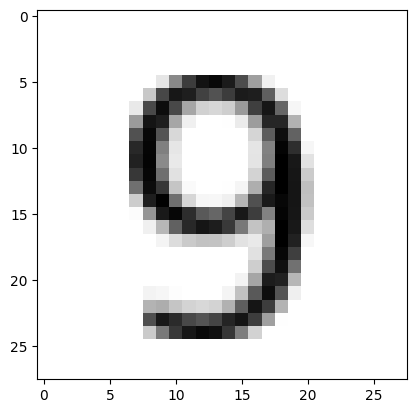

In [174]:
#Plotting a image
plt.imshow(random_digit_image, cmap = plt.cm.binary, interpolation = 'nearest')

In [175]:
#Splitting Dataset into Training and Testing in 80% and 10% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [176]:
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

**Normalizing data**

The pixel values of each image in the dataset ranges between 0 to 255, which are unsigned integers. So in this step, we are normalizing these pixel values, i.e, rescaling them to a range 0 to 1. We are first converting the datatype to floats and then dividing each pixel value by 255 which is maximum value.

In [177]:
#Scaling the dataset. Scaling is a technique to improve model performance by bringing the values in the range of 0 to 1 needed for the NN.
X_train = X_train/255
X_test = X_test/255

In [178]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Reshape**

We reshape all training and test data to 3D matrices into 28x28x1 format. Because Keras needs an extra dimension in the end which is for channel. Since we are using grayscaled images we use only 1 channel.

In [179]:
# Reshape images to 28x28x1 and normalize pixel values
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [180]:
X_train.shape, X_test.shape

((23920, 28, 28, 1), (5980, 28, 28, 1))

In [181]:
#libraries related to keras
import tensorflow as tsf
from tensorflow import keras 
from tensorflow.keras.utils import to_categorical


# importing libraries for building neural netwrok
from keras.models import Sequential,load_model
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization,MaxPooling2D, Dropout, Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping


# **Building CNN**


**Convolution**

We basically have a image and feature detector which is 3X3 filter in our example. The feature detector detects the edges or convex shapes.

**Max Pooling**

It mainly reduces the number of parameters.It makes the detection of features invariant to scale or orientation changes. It reduces the computation in the network, and hence to also control overfitting.

Below are steps we have taken to build this CNN:

- We have initialized the model.
- Added a Convolutional layer with 32 filters of size 3X3 and 'relu' activation function
- Added a Maxpooling layer of size 2X2
- Added a Convlution layer again but with 62 filters of size 3X3 and 'relu' activation function
- Again added a Maxpooling layer of size 2X2
- Applied a dropout with 0.2 probability
- Flattened the layer
- Added a Fully Connected Layer with 1024 units and 'relu' activation function
- Added a Fully Connected layer with 10 units and 'softmax' activation function

In [182]:
CNNmodel = Sequential() 

CNNmodel.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
CNNmodel.add(MaxPool2D(pool_size=(2, 2)))

CNNmodel.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
CNNmodel.add(MaxPool2D(pool_size=(2, 2)))

CNNmodel.add(Dropout(rate=0.2))

CNNmodel.add(Flatten())

CNNmodel.add(Dense(1024, activation="relu"))
CNNmodel.add(Dense(10, activation="softmax"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [183]:
Optimizer="SGD"
BatchSize = 32
Epochs = 10

In [184]:
# Compile the model
from keras.utils import to_categorical

# One-hot encode the target variable
y_train_encoded = to_categorical(y_train)

# Compile the model
CNNmodel.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=Optimizer)

# Use early stopping
callback = EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
historyres = CNNmodel.fit(x=X_train, y=y_train_encoded, batch_size=BatchSize, epochs=Epochs, validation_split=0.3)


Epoch 1/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.4801 - loss: 1.8101 - val_accuracy: 0.9027 - val_loss: 0.3089
Epoch 2/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9288 - loss: 0.2580 - val_accuracy: 0.9529 - val_loss: 0.1591
Epoch 3/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9481 - loss: 0.1794 - val_accuracy: 0.9593 - val_loss: 0.1338
Epoch 4/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9581 - loss: 0.1503 - val_accuracy: 0.9660 - val_loss: 0.1103
Epoch 5/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9658 - loss: 0.1210 - val_accuracy: 0.9727 - val_loss: 0.0969
Epoch 6/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9676 - loss: 0.1127 - val_accuracy: 0.9735 - val_loss: 0.0934
Epoch 7/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9723 - loss: 0.1007 - val_accuracy: 0.9755 - val_loss: 0.0880
Epoch 8/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9732 - loss: 0.0943 - 

In [186]:
#Evaluating model accuracy on test data
from keras.utils import to_categorical

# Convert y_test to one-hot encoding if needed
if len(y_test.shape) == 1:
    y_test_encoded = to_categorical(y_test)
else:
    y_test_encoded = y_test

# Evaluate the model
evalAcc = CNNmodel.evaluate(X_test, y_test_encoded, batch_size=64, verbose=0)
print(f"Test Accuracy: {round(evalAcc[1] * 100, 4)}%")


Test Accuracy: 97.8595%


**Predicting using the built model**

From the CNN model implemented above, we have now utilized the model to predict the lables correctly on test data. Here we have take a sample of 3 images and our model has performed well by predicting all the three images correctly.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Prediction:  6


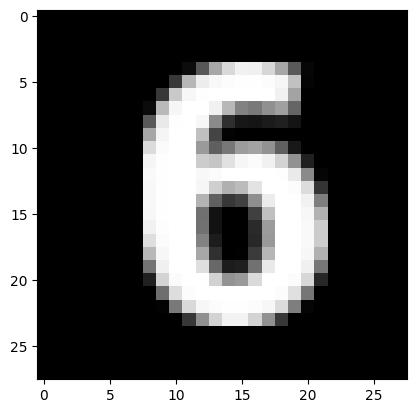

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction:  7


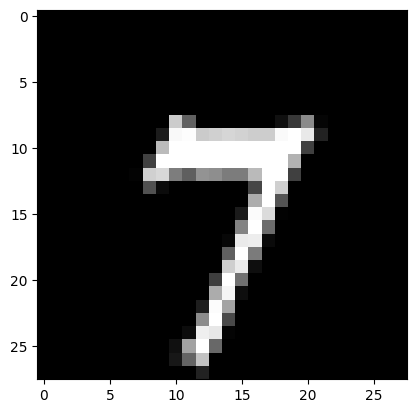

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction:  0


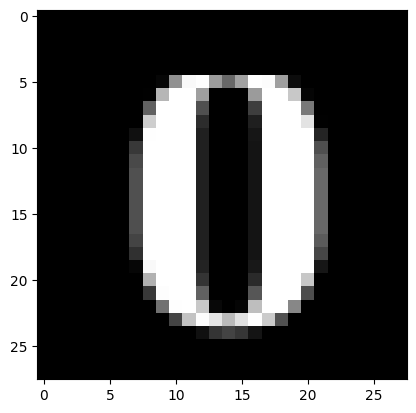

In [187]:
#predicting the charecters using trained model
for i in range(3):
    y_pred = CNNmodel.predict(X_test[i].reshape(1, 28, 28, 1))
    print("Prediction: ",y_pred.argmax())
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.show()

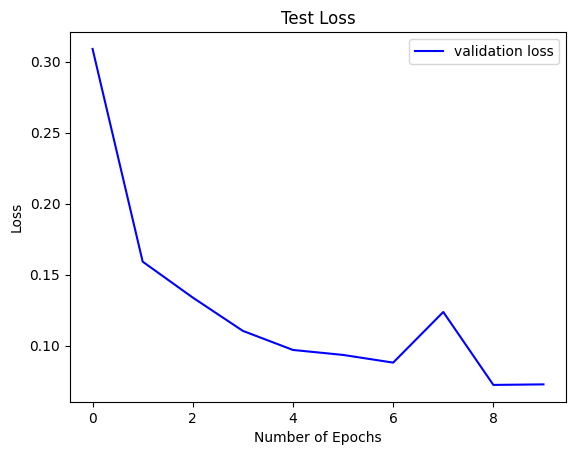

In [188]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(historyres.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

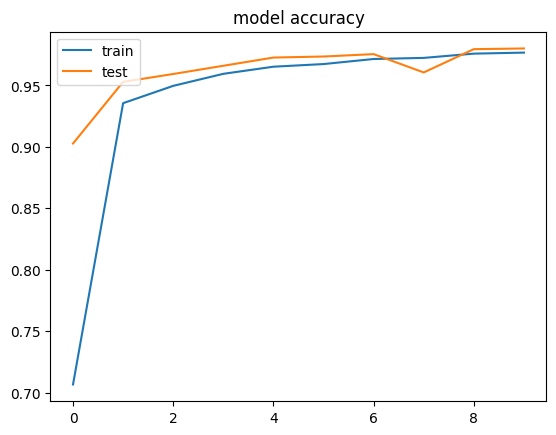

In [189]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(historyres.history['accuracy'])
plt.plot(historyres.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

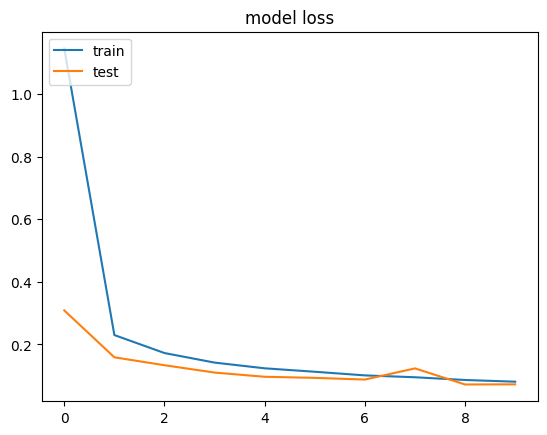

In [190]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(historyres.history['loss'])
plt.plot(historyres.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Conclusion**
- Explored the TMNIST (Typeface MNIST) dataset available on Kaggle, focusing on digit classification using Convolutional Neural Networks (CNNs).
- Conducted basic exploratory data analysis and preprocessed the data by normalization and reshaping to prepare it for CNN modeling.
- Constructed a CNN model with appropriate convolutional layers, max-pooling, flattening, and regularization techniques including dropout and early stopping.
- Achieved a commendable accuracy rate of 97.85% with the CNN model.
- Visualized the accuracy and loss metrics to gain insights into the model's performance and validate its effectiveness in digit classification.






**REFERENCES:**
1. https://www.kaggle.com/code/payalnagaonkar/99-3-accuracy-tminst
2. https://www.kaggle.com/code/schinimilli/tmnist-typeface-digit-classification-using-cnn#Convolution-Neural-Networks-(CNN)
3. https://www.kaggle.com/code/dilipsharma18/neural-network-classification-typeface-mnist
4. chagpt

MIT License

Copyright (c) 2024 prachichatur04

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.